In [1]:
from spatial_models import *
from spatial_indicators import *
from spatial_plotting import *

In [2]:
model = TuringModel(size=50, dt=0.001, dx=0.25)
time_steps = 1000
b = np.arange(100, 40, -1)

# Load Simulation Snapshots

In [3]:
load = True  # set to True to load previous simulation results

if load:
    data = load_data('Results/turing_model.dat')
    snapshots1, snapshots2, snapshots3, snapshots4, snapshots5, snapshots6, snapshots7, snapshots8, snapshots9, snapshots10 = data

# Linearisation

## Stability Without Diffusion

I numerically solved eigenvalues for $|I\sigma-J|=0$ where $J$ is the Jacobian matrix of the system evaluated at the equilibrium.

I plotted the maximum real parts of the eigenvalues at each value of the parameter $b$. The equilibrium becomes unstable to small perturbations when this value reaches zero.

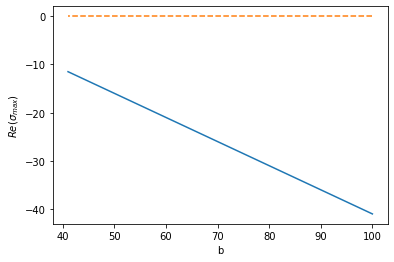

In [4]:
fig, ax = plt.subplots()
plot_max_eigenvalues(ax, model, b, "b")

The maximum real part of the eigenvalues does not reach zero within this parameter range, thus the system remains stable to small perturbations when diffusion is not present.

## Stability With Diffusion

I numerically solved eigenvalues for $|I\sigma-J+Dk^2|=0$, the disperal relation, where $J$ is the Jacobian matrix of the system evaluated at the equilibrium, $D$ is the diffusion matrix containing the diffusion constants of the variables on the diagonals, and $k$ is the wavenumber.

 I plotted the maximum real parts of the eigenvalues at a range of $k$ values at different $b$ levels. Diffusion-driven instaiblity occurs at a particular $b$ values when any of the eigenvalue real parts become positive for any $k$ value. The $k$ value at which the maximum eigenvalue real part occurs is the characteristic spatial scale of the patterns.

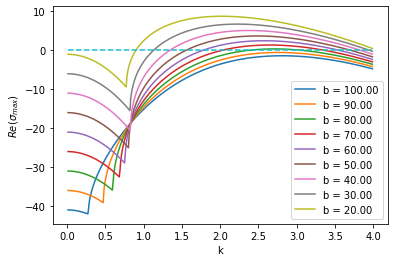

In [5]:
k = np.arange(0.01, 4, 0.01)
fig, ax = plt.subplots()
plot_max_eigenvalues(ax, model, np.arange(100, 10, -10), "b", k)

In [6]:
turing_instability = find_bifurcation(model, 100, 50, -1, "b", tol=0, k=k)
print(f"Turing instability point at b = {turing_instability:.0f}")

Turing instability point at b = 84


The maximum eigenvalue real parts increases as $b$ decreases, with the peak at $k\approx2-3$. The peak wavenumber decreases with decreasing $b$. Diffusion-driven instability occurs at $b=84$, thus pattern formation occurs at this point.

# Effects of Noise

## Additive Noise

I simulated the model at different levels of additive noise, where the noise does not depend on the variable values.

In [7]:
model.noise = "additive"
sigma = [0.01, 0.05, 0.25]

### $\sigma=0.01$

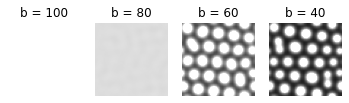

In [8]:
if not load:
    model.sigma = sigma[0]
    snapshots1 = parameter_change(model, b, "b", time_steps)
plot_snapshots(snapshots1, [100, 80, 60, 40], "b", vmin=0, vmax=1, precision=0)

### $\sigma=0.05$

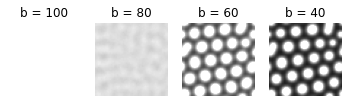

In [9]:
if not load:
    model.sigma = sigma[1]
    snapshots2 = parameter_change(model, b, "b", time_steps)
plot_snapshots(snapshots2, [100, 80, 60, 40], "b", vmin=0, vmax=1, precision=0)

### $\sigma=0.25$

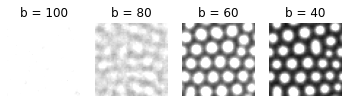

In [10]:
if not load:
    model.sigma = sigma[2]
    snapshots3 = parameter_change(model, b, "b", time_steps)
plot_snapshots(snapshots3, [100, 80, 60, 40], "b", vmin=0, vmax=1, precision=0)

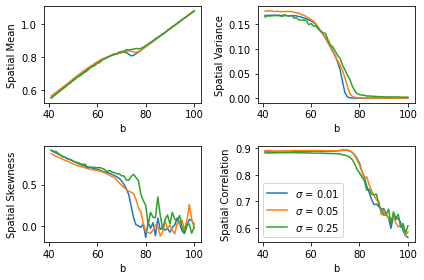

In [11]:
spatial_indicator_grid([snapshots1, snapshots2, snapshots3], "b", levels=sigma, level_name=r"$\sigma$", legend_loc=(1,1))

The spatial indicators remained largely the same for each level of noise. Pattern formation was induced earlier when noise was larger, as shown by the spatial mean deviating from the homogeneous equilibrium earlier.

## Multiplicative Noise

I simulated the model at different levels of multiplicative noise, where the noise depends linearly on the variable values.

In [12]:
model.noise = "multiplicative"
sigma = [0.01, 0.1]

### $\sigma=0.01$

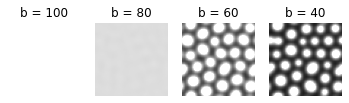

In [13]:
if not load:
    model.sigma = sigma[0]
    snapshots4 = parameter_change(model, b, "b", time_steps)
plot_snapshots(snapshots4, [100, 80, 60, 40], "b", vmin=0, vmax=1, precision=0)

### $\sigma=0.1$

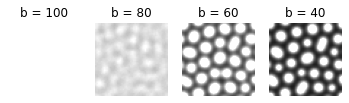

In [14]:
if not load:
    model.sigma = sigma[1]
    snapshots5 = parameter_change(model, b, "b", time_steps)
plot_snapshots(snapshots5, [100, 80, 60, 40], "b", vmin=0, vmax=1, precision=0)

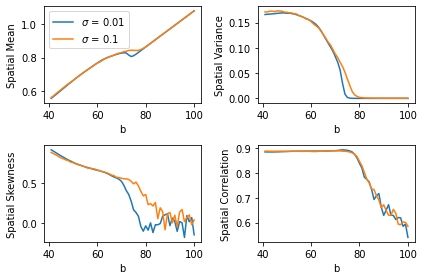

In [15]:
spatial_indicator_grid([snapshots4, snapshots5], "b", levels=sigma, level_name=r"$\sigma$")

Similar results to additive noise.

# Duration of Run

I simulated the model just past the Turing instability point at different levels of noise for a large number of time steps.

In [32]:
model.b = 80
model.noise = "additive"
time_steps = 25000
sigma = [0.01, 0.05, 0.25]

## $\sigma=0.01$

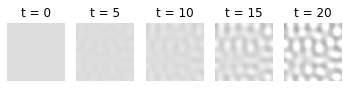

In [33]:
if not load:
    model.sigma = sigma[0]
    snapshots6 = simulate_time_steps(model, time_steps, *model.initialisation())
    snapshots6 = snapshots6.iloc[::100]
plot_snapshots(snapshots6, [0, 5, 10, 15, 20], "t", vmin=0, vmax=1, precision=0)

## $\sigma=0.05$

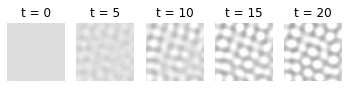

In [34]:
if not load:
    model.sigma = sigma[1]
    snapshots7 = simulate_time_steps(model, time_steps, *model.initialisation())
    snapshots7 = snapshots7.iloc[::100]
plot_snapshots(snapshots7, [0, 5, 10, 15, 20], "t", vmin=0, vmax=1, precision=0)

## $\sigma=0.25$

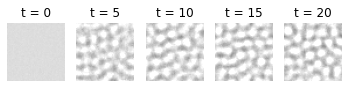

In [35]:
if not load:
    model.sigma = sigma[2]
    snapshots8 = simulate_time_steps(model, time_steps, *model.initialisation())
    snapshots8 = snapshots8.iloc[::100]
plot_snapshots(snapshots8, [0, 5, 10, 15, 20], "t", vmin=0, vmax=1, precision=0)

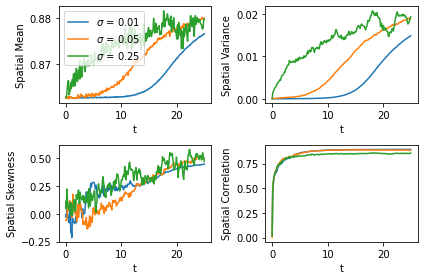

In [36]:
spatial_indicator_grid([snapshots6, snapshots7, snapshots8], "t", levels=sigma, level_name=r"$\sigma$")

When the level of noise is higher pattern formation occurs earlier, as shown by the spatial mean and variance increasing earlier. Other indicators remain similar for each level of noise

## Change in Noise

### Additive Noise

I simulated the model near the Turing instability point while slowly increasing the additive noise level.

In [53]:
noise = np.arange(0.05, 0.3, 0.01)
model.noise = "additive"
model.b = 80

if not load:
    snapshots9 = parameter_change(model, noise, "sigma", time_steps=1000, warm_up=20000)

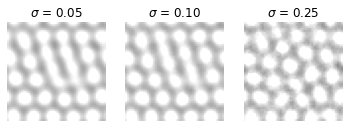

In [54]:
plot_snapshots(snapshots9, [0.05, 0.1, 0.25], r"$\sigma$", vmin=0, vmax=1, precision=2)

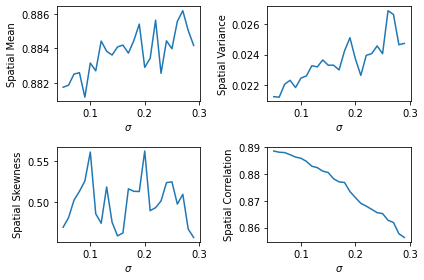

In [55]:
spatial_indicator_grid(snapshots9, r"$\sigma$")

As the noise level increases, the spatial mean and spatial variance increase. There appears to be no trend in spatial skewness. Spatial correlation decreases due to noise breaking down patterns.

### Multiplicative Noise

I simulated the model near the Turing instability point while slowly increasing the multiplicative noise level.

In [59]:
model.noise = "multiplicative"
noise = np.arange(0.05, 0.25, 0.01)

if not load:
    snapshots10 = parameter_change(model, noise, "sigma", time_steps=1000, warm_up=20000)

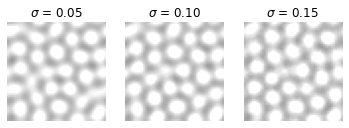

In [60]:
plot_snapshots(snapshots10, [0.05, 0.1, 0.15], r"$\sigma$", vmin=0, vmax=1, precision=2)

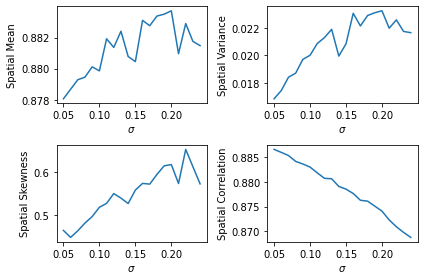

In [61]:
spatial_indicator_grid(snapshots10, r"$\sigma$")

Similar results to additive noise, except spatial skewness also increases.

# Spatial Spectral Properties

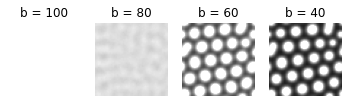

In [27]:
plot_snapshots(snapshots2, [100, 80, 60, 40], "b", vmin=0, vmax=1, precision=0)

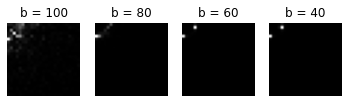

In [28]:
plot_power_spectra(snapshots2, [100, 80, 60, 40], "b", precision=0)

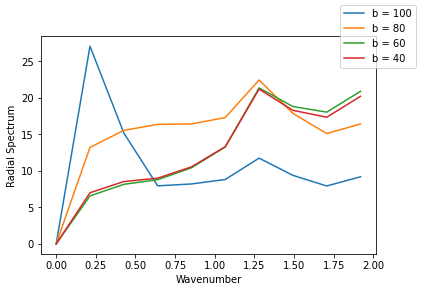

In [29]:
plot_radial_spectra(snapshots2, model.dx, [100, 80, 60, 40], "b")

# Homogeneous Equilibria

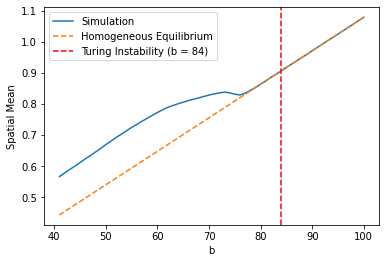

In [30]:
fig, ax = plt.subplots()
plot_spatial_indicator(ax, snapshots2, "mean", "b")
plot_equilibria(ax, model, b, "b")
ax.axvline(turing_instability, linestyle='--', color='red')
ax.legend(["Simulation", "Homogeneous Equilibrium", f"Turing Instability (b = {turing_instability:.0f})"])

I plotted the simulation results against the homogeneous equilibria. The simulation closely followed the homogeneous equilibrium before pattern formation occurs.

I also plotted the Turing instability point at $b=84$ and observe that pattern formation occurs a while after. It probably did not immediately occur because I only simulated 1000 time steps ($t=1$) at each parameter step, which was not enough time to induce patterns.

# Save Simulation Snapshots

In [31]:
save = False  # set to True to save current simulation results

if save:
    data = (snapshots1, snapshots2, snapshots3, snapshots4, snapshots5, snapshots6, snapshots7, snapshots8, snapshots9, snapshots10)
    save_data('Results/turing_model.dat', data)